In [131]:
import pandas as pd
import seaborn as sns
import pygal
from collections import Counter
from matplotlib import pyplot as plt
from IPython.display import SVG, HTML, display

In [2]:
df = pd.read_csv('../data/train.csv')

In [3]:
df.head()

,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
0,00RL8Z82B2Z1,aff3928535f48,1541037460,1,search for poi,Newtown,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
1,00RL8Z82B2Z1,aff3928535f48,1541037522,2,interaction item image,666856,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
2,00RL8Z82B2Z1,aff3928535f48,1541037522,3,interaction item image,666856,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
3,00RL8Z82B2Z1,aff3928535f48,1541037532,4,interaction item image,666856,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
4,00RL8Z82B2Z1,aff3928535f48,1541037532,5,interaction item image,109038,AU,"Sydney, Australia",mobile,NaN,NaN,NaN


In [39]:
# only 1/15 of the interactions have filters applied
df.count()

user_id            15932992
session_id         15932992
timestamp          15932992
step               15932992
action_type        15932992
reference          15932992
platform           15932992
city               15932992
device             15932992
current_filters     1153112
impressions         1586586
prices              1586586
dtype: int64

In [45]:
# number of unique users
unique_user_count = len(df['user_id'].unique())
unique_user_count

730803

In [46]:
# number of unique sessions
unique_session_count = len(df['session_id'].unique())
unique_session_count

910683

In [83]:
# sessions per user
sessions_per_user_df = df[['user_id', 'session_id']].drop_duplicates().groupby('user_id').count()

In [82]:
session_count_df = pd.DataFrame.from_dict(Counter(sessions_per_user_df['session_id']), orient='index')
session_count_df = session_count_df.sort_index().rename(columns={0: 'user_count'})
session_count_df.index.name = 'session_count'
session_count_df

,user_count
session_count,
1,610601
2,86211
3,21180
4,7158
5,2828
6,1315
7,576
8,361
9,201


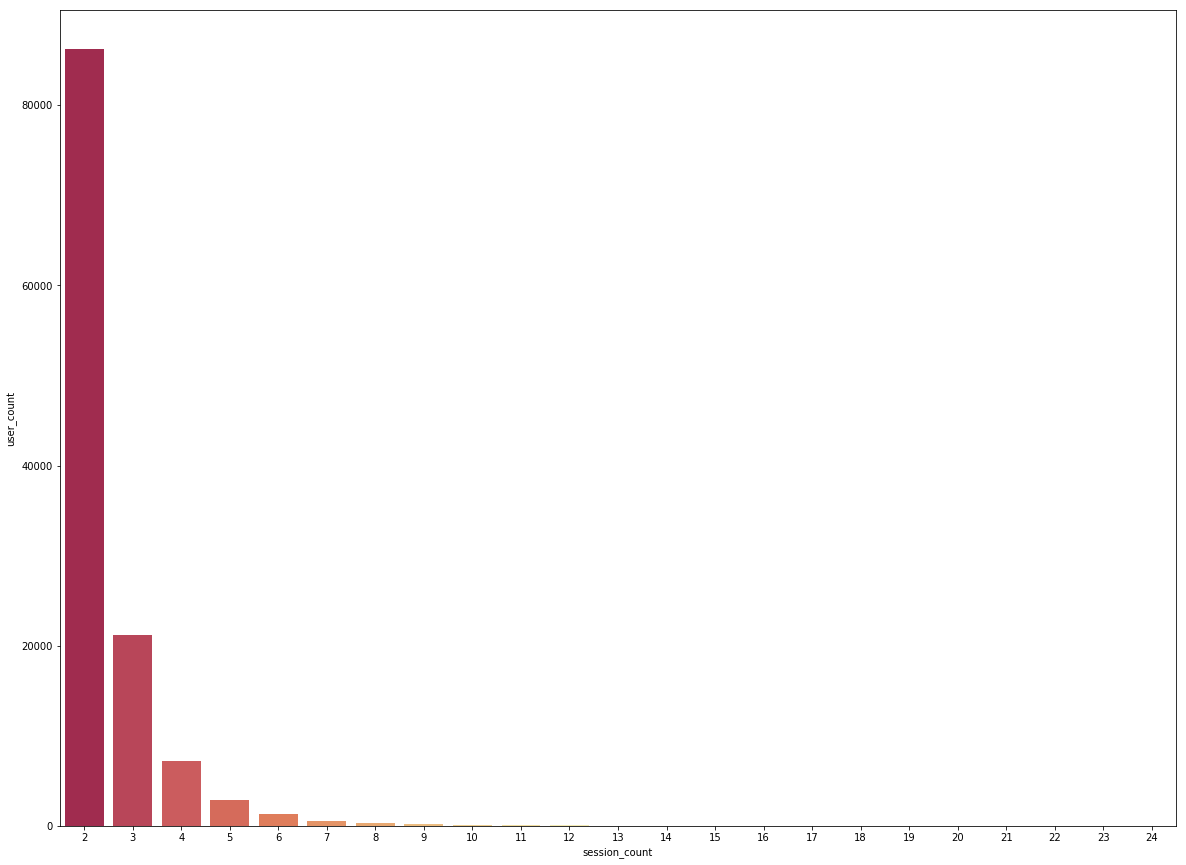

In [86]:
plt.figure(2, figsize=(20,15))
sns.barplot(x='session_count',y='user_count', data=session_count_df.drop([1, 51, 201]).reset_index(), palette='Spectral')

In [96]:
# distrubtion of actions over time
df['timestamp'].describe().apply(lambda time: pd.to_datetime(time, unit='s')).drop(['count', 'std'])

mean   2018-11-04 04:00:41.016397715
min    2018-11-01 00:00:08.000000000
25%    2018-11-02 15:47:56.000000000
50%    2018-11-04 08:22:46.000000000
75%    2018-11-05 16:52:28.000000000
max    2018-11-06 23:59:59.000000000
Name: timestamp, dtype: datetime64[ns]

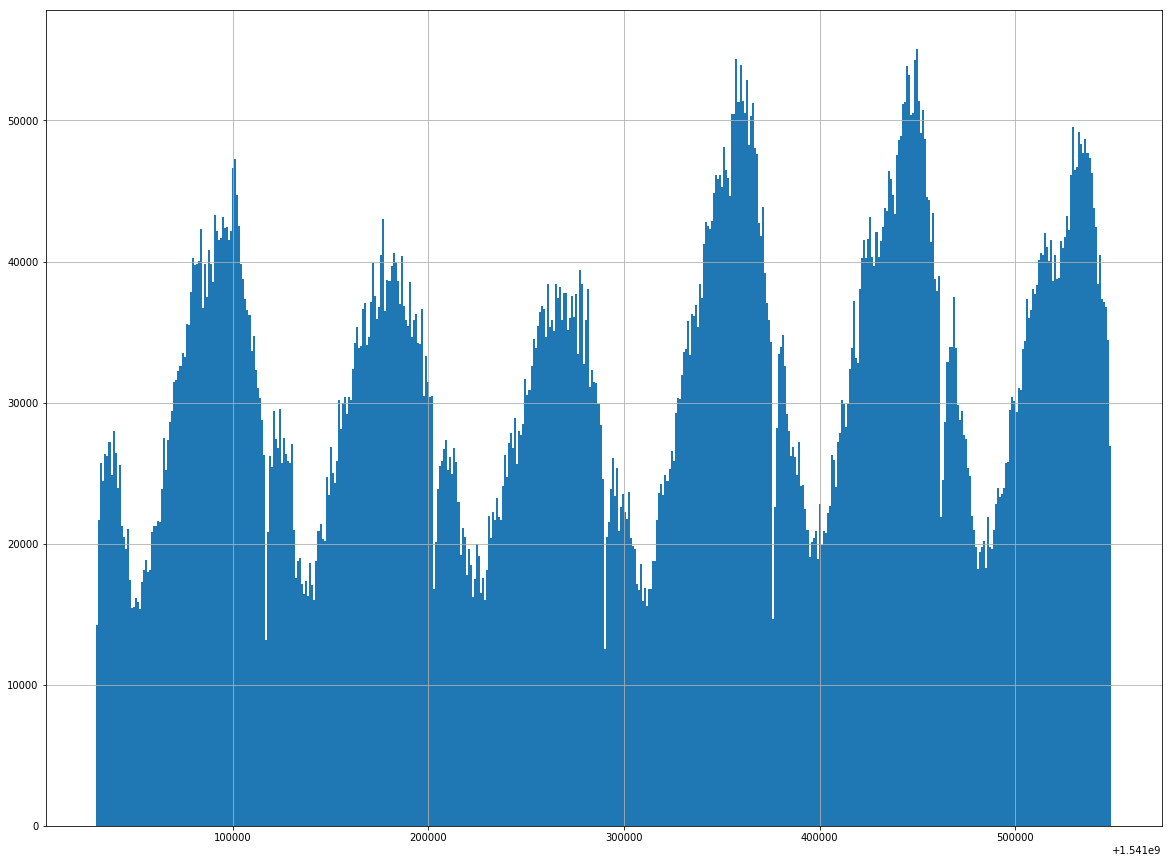

In [104]:
df['timestamp'].hist(bins=500, figsize=(20,15))

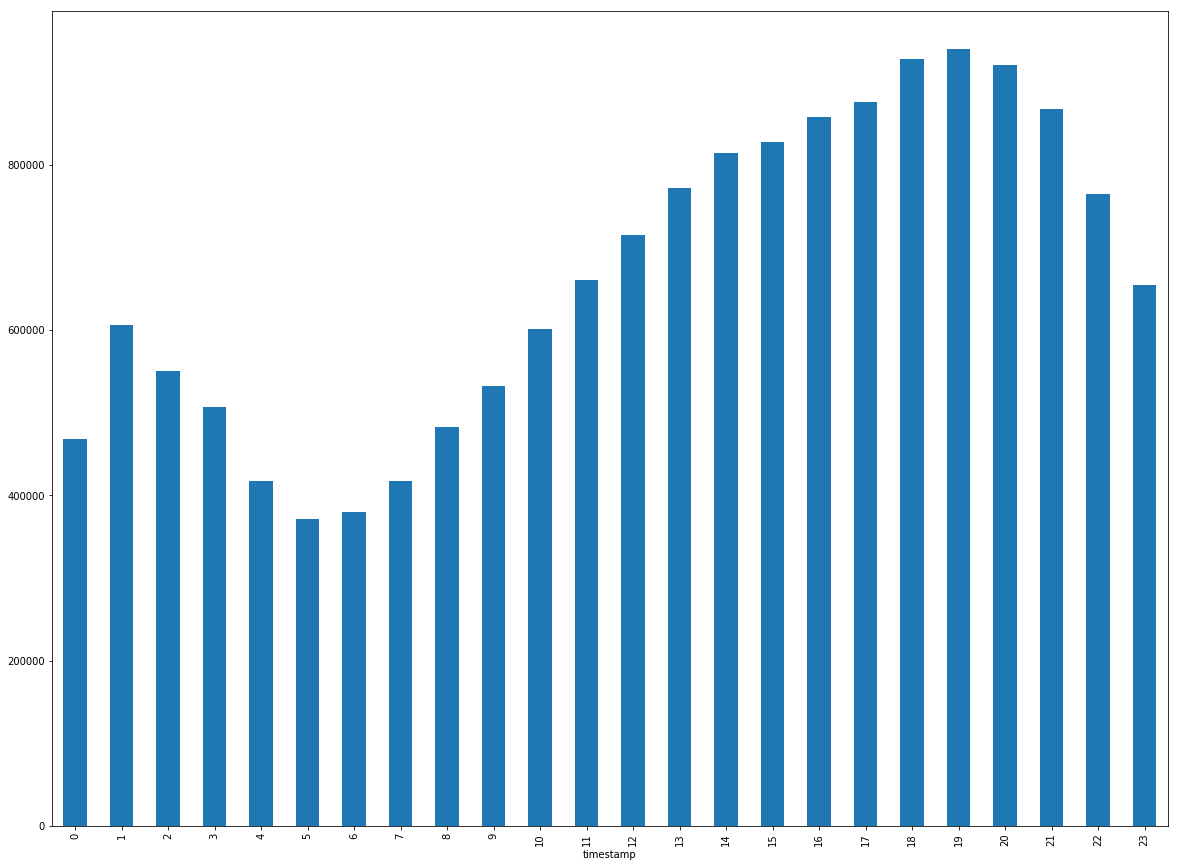

In [112]:
df_date_time = pd.to_datetime(df['timestamp'], unit='s')

# distribution of actions over hour of day
plt.figure(figsize=(20,15))
df_date_time.groupby(df_date_time.dt.hour).count().plot(kind="bar")

In [10]:
action_types_hist = Counter(df['action_type'])

In [160]:
action_types_df = pd.DataFrame.from_dict(action_types_hist, orient='index').reset_index()
action_types_df = action_types_df.rename(columns={'index': 'action_type', 0: 'count'})
action_types_df = action_types_df.sort_values(by=['count'], ascending=False)
action_types_df

,action_type,count
1,interaction item image,11860750
2,clickout item,1586586
6,filter selection,695917
5,search for destination,403066
9,change of sort order,400584
3,interaction item info,285402
7,interaction item rating,217246
4,interaction item deals,193794
8,search for item,152203
0,search for poi,137444


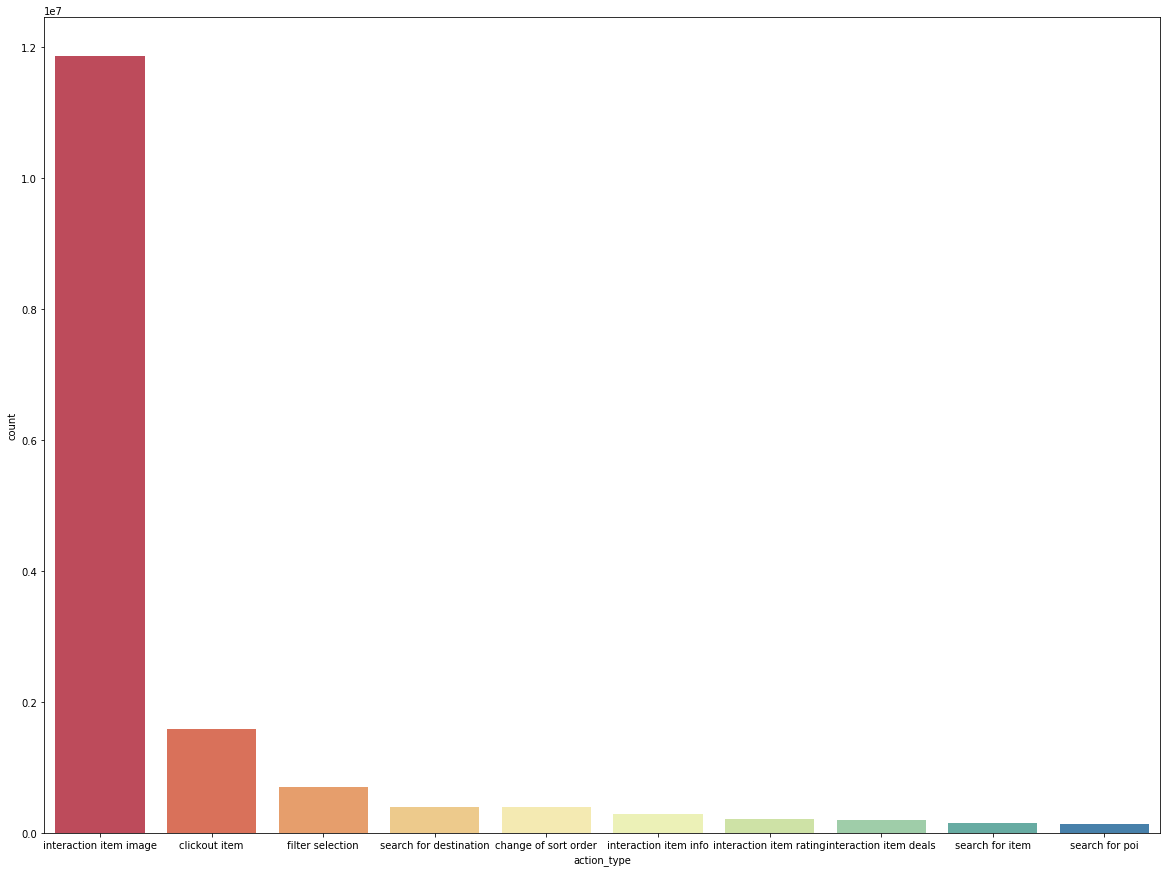

In [161]:
plt.figure(2, figsize=(20,15))
sns.barplot(x='action_type',y='count', data=action_types_df, palette='Spectral')

In [158]:
platform_df = pd.DataFrame.from_dict(Counter(df['platform']), orient='index').reset_index()
platform_df = platform_df.rename(columns={'index': 'country', 0: 'count'})
platform_df = platform_df.sort_values(by='count', ascending=False)
platform_df

,country,count
1,BR,2634304
4,US,1627520
23,DE,1001105
3,UK,918900
5,MX,833785
11,IN,679747
0,AU,595003
38,TR,564271
20,JP,547480
7,IT,527046


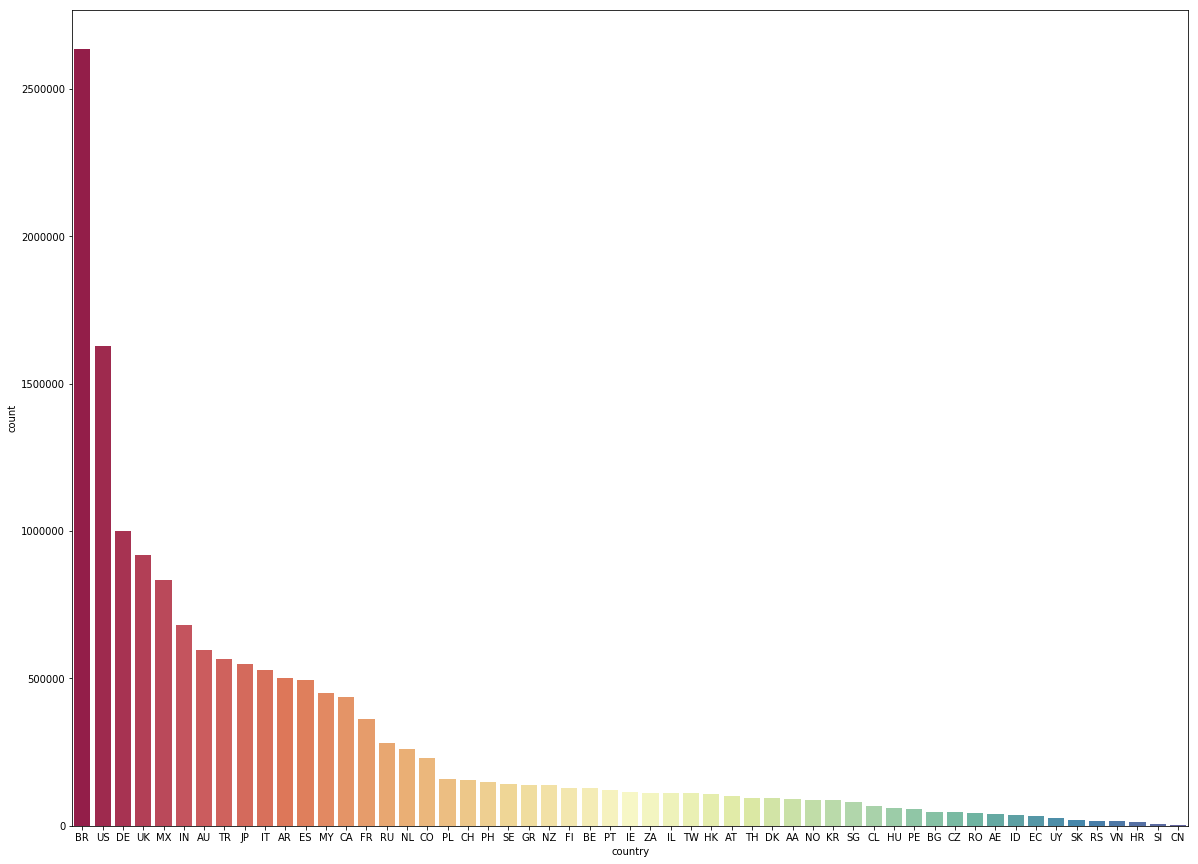

In [159]:
plt.figure(figsize=(20,15))
sns.barplot(x='country',y='count', data=platform_df, palette='Spectral')

In [147]:
worldmap_chart = pygal.maps.world.World()
worldmap_chart.title = 'Actions by Country'
worldmap_chart.add('Country', values=Counter(df['platform'].str.lower()))

worldmap_chart.render_to_file('02-actions_by_country.svg')

# display(SVG(worldmap_chart.render(disable_xml_declaration=True, is_unicode=True)))
# display({'image/svg+xml': worldmap_chart.render()}, raw=True)
# display(SVG(data=worldmap_chart.render()))